# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [5]:
! git clone https://github.com/rze7ud/labs/

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

Cloning into 'labs'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 98 (delta 35), reused 40 (delta 20), pack-reused 34 (from 1)
Receiving objects: 100% (98/98), 20.79 MiB | 23.60 MiB/s, done.
Resolving deltas: 100% (37/37), done.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16814 entries, 0 to 16813
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sale_date                    16814 non-null  object
 1   sale_price                   16814 non-null  int64 
 2   house_square_feet            16814 non-null  int64 
 3   attic_finished_square_feet   16814 non-null  int64 
 4   basement_square_feet         16814 non-null  int64 
 5   attached_garage_square_feet  16814 non-null  int64 
 6   detached_garage_square_feet  16814 non-null  int64 
 7   fireplaces                   16814 non-null  int64 
 8   hvac_description             16807 non-null  object
 9   exterior                     16813 non-null  object
 10  interior                     16807 non-null  object
 11  stories                      16814 non-null  int64 
 12  roof_cover                   16806 non-null  object
 13  year_built                   16

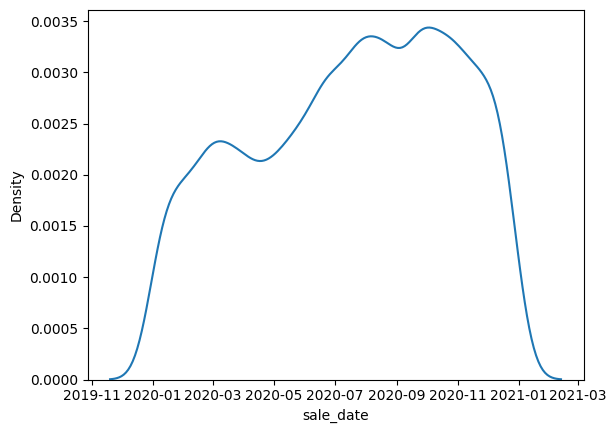

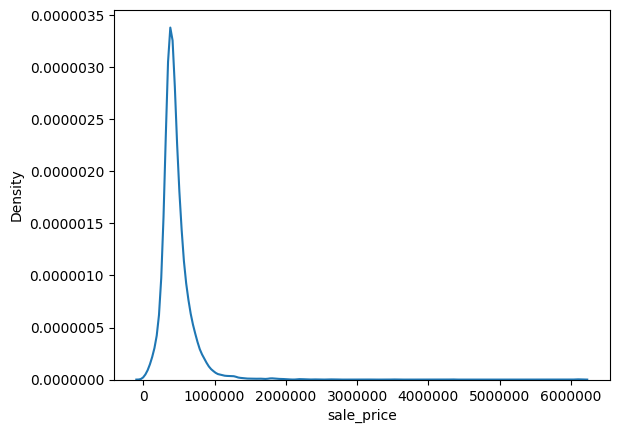

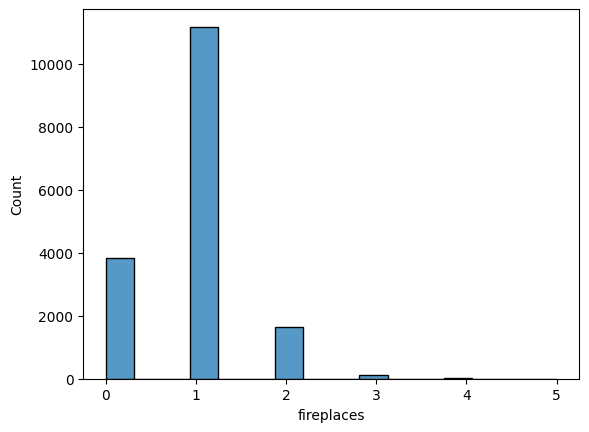

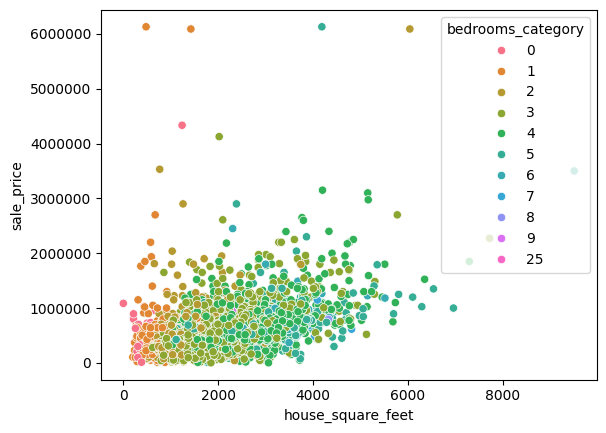

In [43]:
# Question 1
df = pd.read_csv('/content/labs/04_hedonic_pricing/pierce_county_house_sales.csv')
df.info()
for i in df.columns:
  column = df[i]
  print(i + ':')
  print(column.unique())

df['sale_date'] = pd.to_datetime(df['sale_date'])

plt.figure()
sns.kdeplot(df['sale_date'])

plt.figure()
sns.kdeplot(df['sale_price'])
plt.ticklabel_format(style='plain')

# lol
plt.figure()
sns.histplot(df['fireplaces'])

plt.figure()
df['bedrooms_category'] = df['bedrooms'].astype('category')
sns.scatterplot(data=df, x='house_square_feet', y='sale_price', hue='bedrooms_category')
plt.ticklabel_format(style='plain', axis='y')

In [47]:
# Question 2
categorical = ['hvac_description', 'exterior', 'interior', 'roof_cover', 'waterfront_type', 'view_quality', 'utility_sewer']

df_dummies = pd.DataFrame()
for column in categorical:
    dummies = pd.get_dummies(df[column], prefix=column)
    df_dummies = pd.concat([df_dummies, dummies], axis=1)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16814 entries, 0 to 16813
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   hvac_description_Electric                16814 non-null  bool 
 1   hvac_description_Electric Baseboard      16814 non-null  bool 
 2   hvac_description_Floor Wall Furnace      16814 non-null  bool 
 3   hvac_description_Floor/Wall Furnace      16814 non-null  bool 
 4   hvac_description_Forced Air              16814 non-null  bool 
 5   hvac_description_Heat Pump               16814 non-null  bool 
 6   hvac_description_Hot Water Baseboard     16814 non-null  bool 
 7   hvac_description_No Heat                 16814 non-null  bool 
 8   hvac_description_Warm and Cool Air Zone  16814 non-null  bool 
 9   exterior_Cedar A-Frame                   16814 non-null  bool 
 10  exterior_Cedar Finished Cabin            16814 non-null  bool 
 11  ex

In [50]:
# Question 3
y = df['sale_price']
X = df.drop(['sale_price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Question 4
